In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 2210 		 0.1 		 0.1 |
| 170 		 0.1 		 0.1 |
| 1561 		 0.1 		 0.1 |
| 810 		 0.1 		 0.1 |
| 1267 		 0.1 		 0.1 |
| 899 		 0.1 		 0.1 |
| 5448 		 0.1 		 0.1 |
| 887 		 0.1 		 0.1 |
| 1963 		 0.1 		 0.1 |
| 3519 		 0.1 		 0.1 |
| 1370 		 0.1 		 0.1 |
| 578 		 0.1 		 0.1 |
| 589 		 0.1 		 0.1 |
| 2440 		 0.1 		 0.1 |
| 3973 		 0.1 		 0.1 |
| 528 		 0.1 		 0.1 |
| 1908 		 0.1 		 0.1 |
| 4720 		 0.1 		 0.1 |
| 2581 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1322.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 2175
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


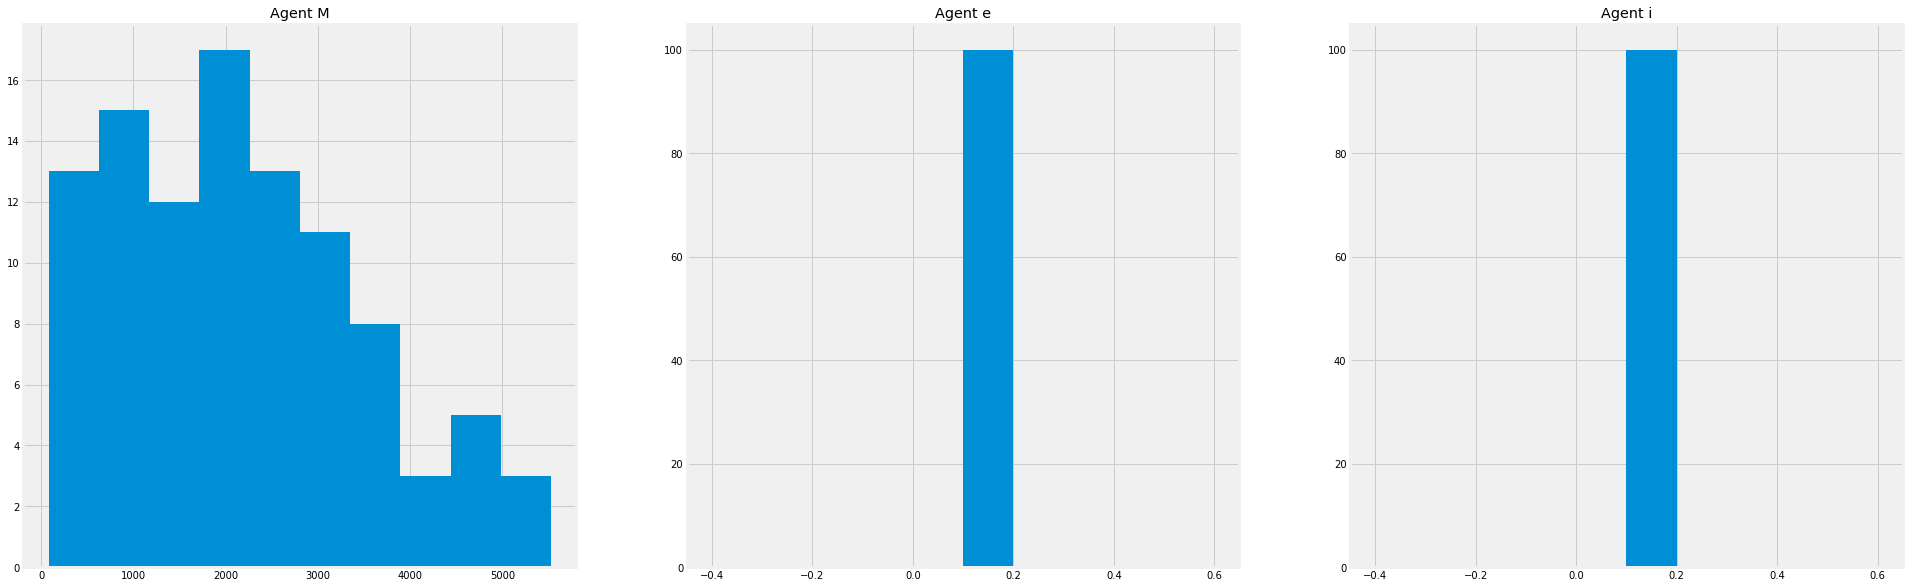

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 15.0, Temptation: 17.0, Sucker: -2.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 199.0, Temptation: 221.0, Sucker: -22.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 140.0, Temptation: 156.0, Sucker: -16.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 199.0, Temptation: 221.0, Sucker: -22.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 73.0, Temptation: 81.0, Sucker: -8.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 199.0, Temptation: 221.0, Su

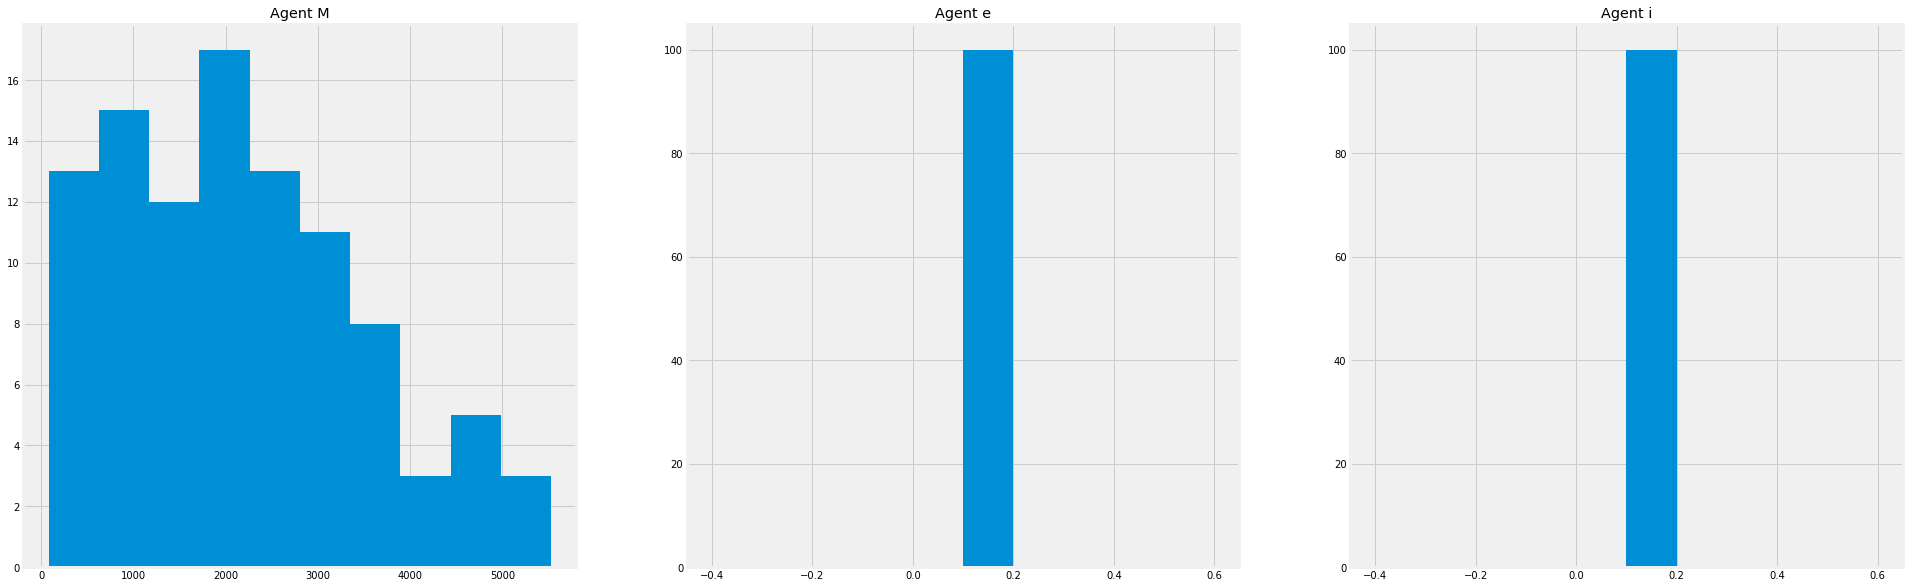

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 24 minutes.
    S.D.  Counts Seed
0    0.5     296  256
1    0.6     278  256
2    0.7     277  256
3    0.8     265  256
4    0.9     219  256
5    1.0     205  256
6    1.1     190  256
7    1.2     156  256
8    1.3     140  256
9    1.4     142  256
10   1.5     115  256
11   1.6      95  256
12   1.7      82  256
13   1.8      59  256
14   1.9      42  256
15   2.0      31  256
16   2.1      25  256
17   2.2      17  256
18   2.3      12  256
19   2.4      12  256
20   2.5       7  256
21   2.6       3  256
22   2.7       3  256
23   2.8       2  256
24   2.9       1  256
25   3.0       0  256


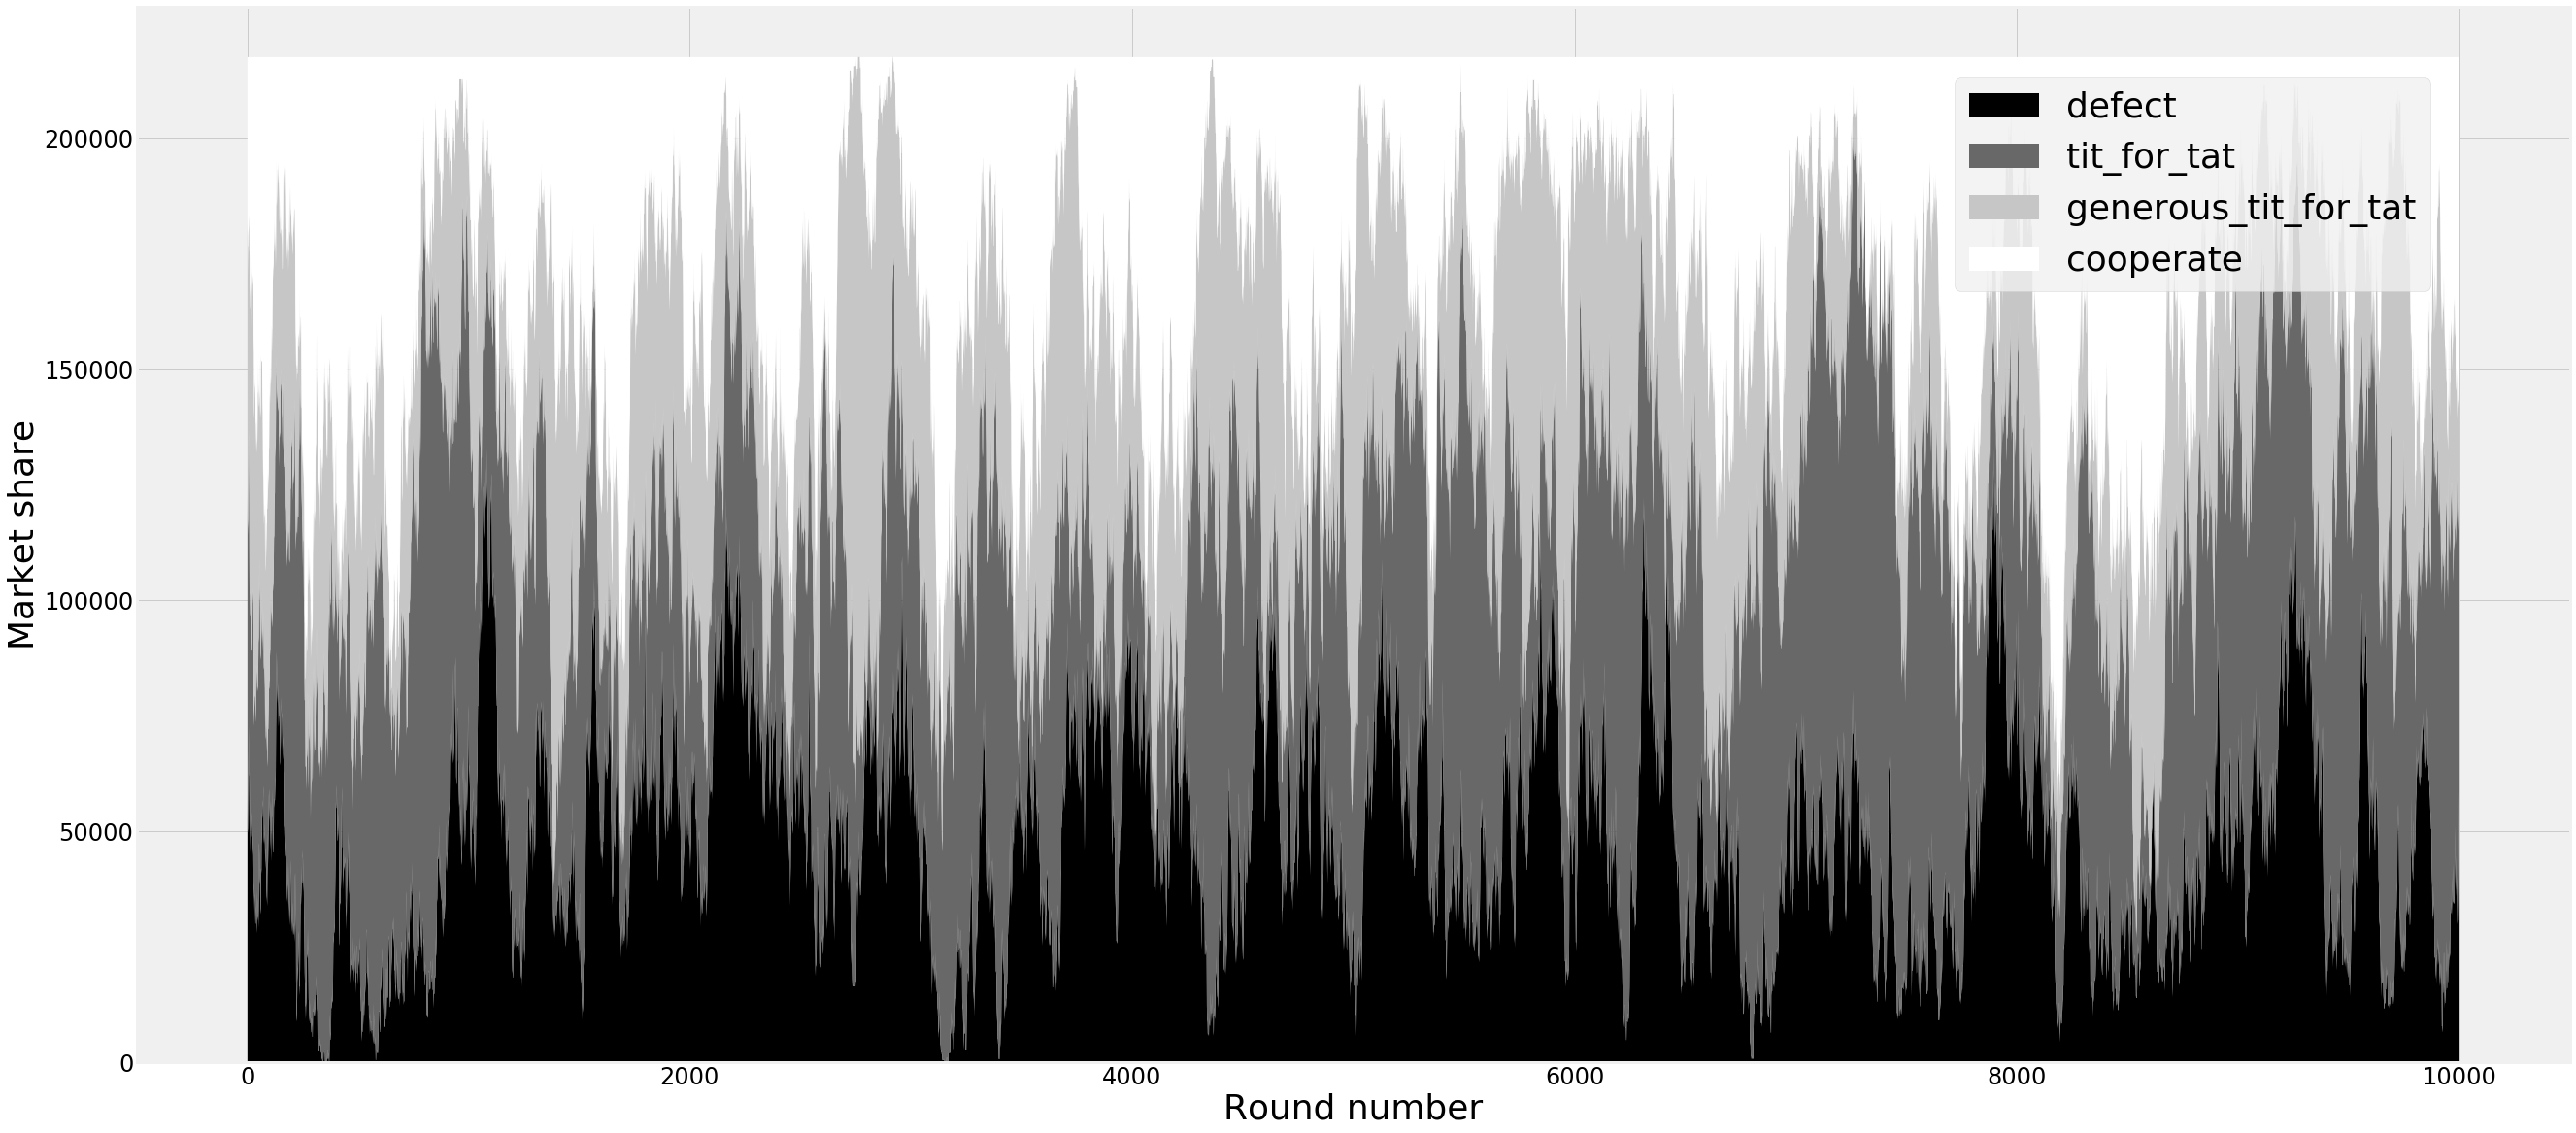

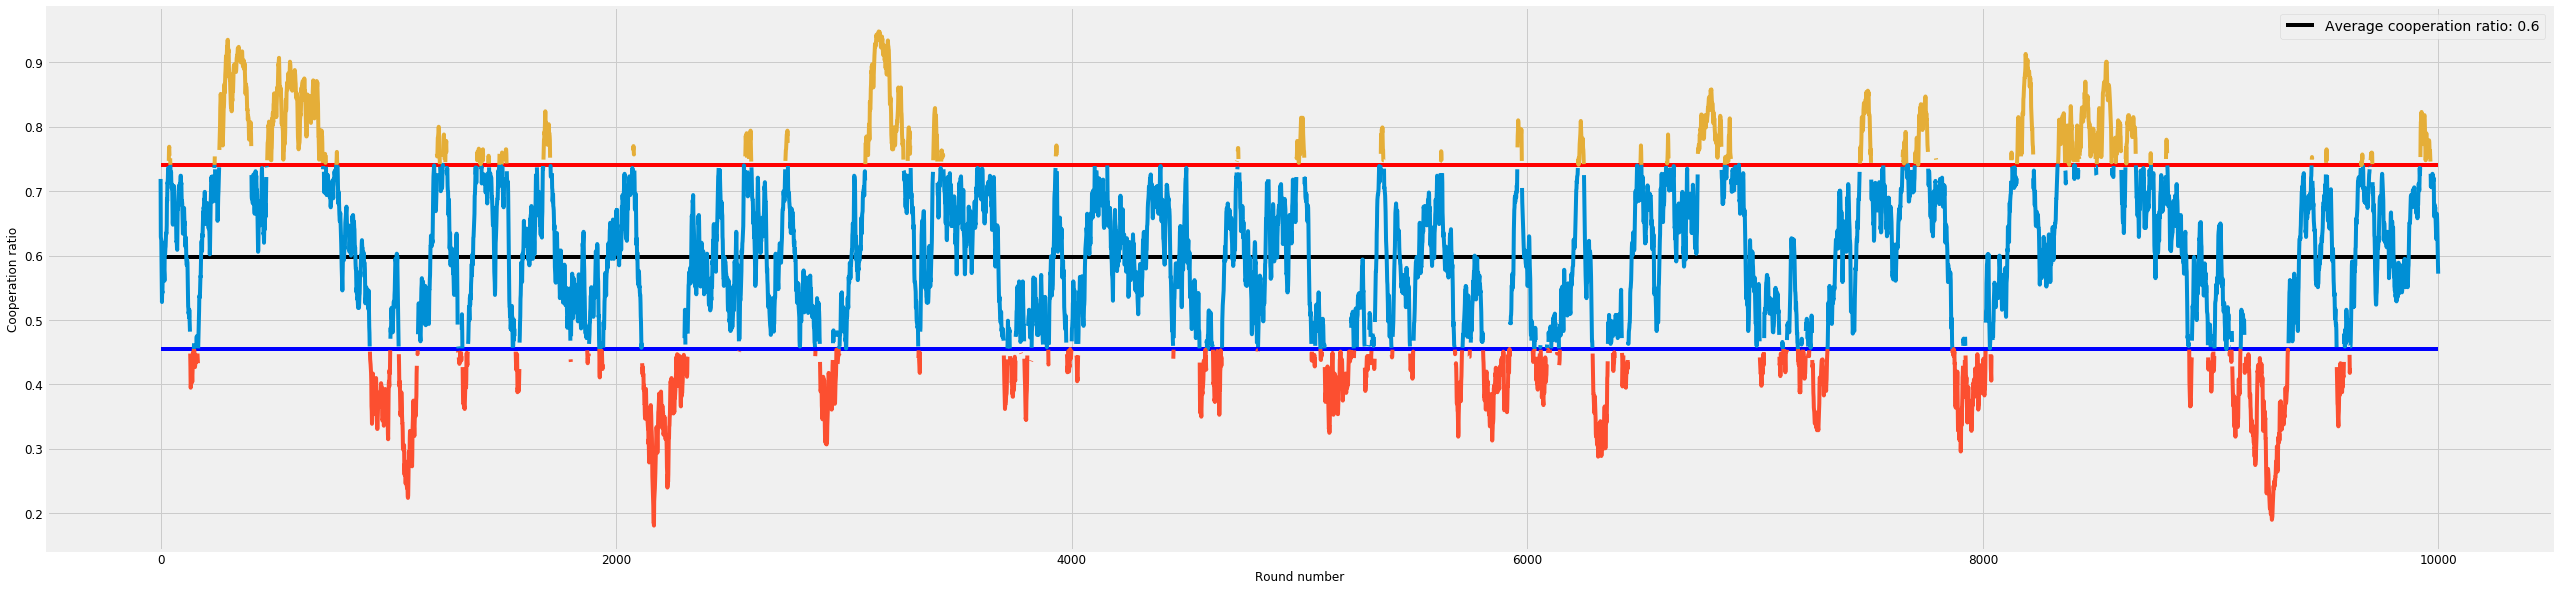

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdm", seed = str(seed))